In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

n0 = Nombre d'entrée
n1 = Nombre de neurones dans la couche 1
n2 = Nombre de neurones dans la couche 2.

In [5]:
def initialisation(dimensions):

    parametres = {}

    for couche in range(1, len(dimensions)):
        parametres['W' + str(couche)] = np.random.randn(dimensions[couche], dimensions[couche-1])
        parametres['b' + str(couche)] = np.zeros((dimensions[couche], 1))

    return parametres

In [24]:
def forward_propagation(X, parametres):

    activations = {'A0': X}
    C = len(parametres)//2
    for couche in range(1, C +1):
        Z = parametres['W' + str(couche)].dot(activations['A' + str(couche-1)]) + parametres['b'+str(couche)]
        activations['A'+str(couche)] = 1/ (1+np.exp(-Z))

    return activations

In [25]:
def back_propagation(X, y, parametres, activations):

    m = y.shape[1]
    gradients = {}
    C = len(parametres)//2
    dZ = activations['A' + str(C)] - y

    for couche in reversed(range(1, C+1)):
        gradients['dW'+str(couche)] = 1/m * np.dot(dZ, activations['A'+str(couche-1)].T)
        gradients['db'+str(couche)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if couche > 1:
            dZ = np.dot(parametres['W'+str(couche)].T, dZ) * activations['A' + str(couche-1)] * (1 - activations['A' + str(couche-1)])

    return gradients

In [26]:
def update(gradients, parametres, learning_rate):

    C = len(parametres)//2

    for couche in range(1,C+1):
        parametres['W'+str(couche)]-= learning_rate*gradients['dW'+str(couche)]
        parametres['b'+str(couche)]-= learning_rate*gradients['db'+str(couche)]

    return parametres

In [27]:
def predict(X, parametres):
    C = len(parametres)//2
    activations = forward_propagation(X, parametres)
    Af = activations['A'+str(C)]
    return Af >= 0.5

In [34]:
def neural_network(X, y, hidden_layers=(32,32,32), learning_rate = 0.1, n_iter = 1000):

    np.random.seed(0)
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])
    parametres = initialisation(dimensions)

    train_loss = []
    train_acc = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)

        if i % 10 == 0:
            # Plot courbe d'apprentissage
            C = len(parametres)//2
            train_loss.append(log_loss(y.flatten(), activations['A'+str(C)].flatten()))
            y_pred = predict(X, parametres)
            train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
    ax[0].plot(train_loss, label='train loss')
    ax[0].legend()

    ax[1].plot(train_acc, label='train acc')
    ax[1].legend()

    plt.show()

    return parametres

dimensions de X: (2, 100)
dimensions de y: (1, 100)


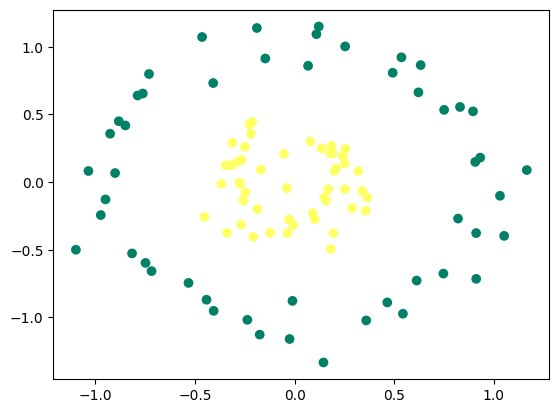

In [35]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 3000/3000 [00:01<00:00, 2866.45it/s]


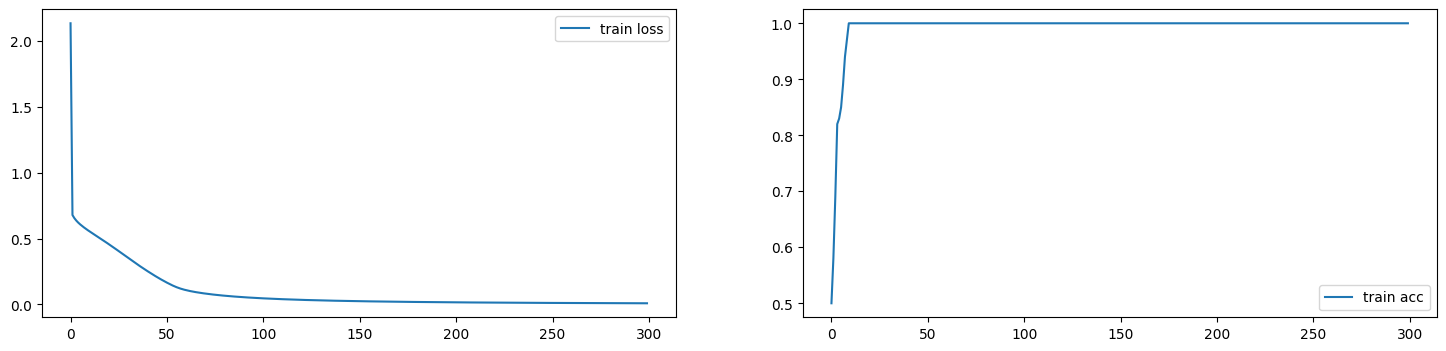

In [39]:
param = neural_network(X,y, n_iter=3000, learning_rate=0.1)